# Домашнее задание 1

В данной домашке мы немного поупражняемся с обработкой временных данных и базовыми моделями. В приложенном файле находится всего один временной ряд. Он представляет из себя срезы некоторых значений, связанных с ликвидностью одного крупного российского банка. Требуется построить модель, способную прогнозировать суммарное значение этого ряда за день. Данные достаточно сложные и хорошую модель на них построить непросто, но в учебных целях подойдут.

#### Описание бизнес-процесса, связанного с рядом.

Прогнозная величина позволяет установить сальдо поступлений и списаний за день. На основании прогноза позиционер (управляет ликвидностью) принимает решение о выделении средств на размещение на рынке деривативов для получения дополнительной маржи. В случае, если на конец дня образуется профицит ликвидности, его можно разместить в ЦБ по overnight ставке, равной ключевой-0.9%. В случае, если на конец дня образуется дефицит ликвидности, его можно покрыть за счет займа по overnight ставке, равной ключевая+1%. 




##### 1) Загрузка данных (0.5 балла)

Загрузите временной ряд. Преобразуйте даты во временных данных. Какова частотность (frequency) данных? Не спешите отвечать на этот вопрос и посмотрите на данные внимательно. Выберите подходящий под данные оффсет и сделайте ресэмпл ряда к этому оффсету.

In [1]:
# ༼ つ ◕_◕ ༽つ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (23,9)
data = pd.read_csv('data.csv')

In [2]:
data.Date.head()

0    2017-01-09 09:00:00.000
1    2017-01-09 11:00:00.000
2    2017-01-09 13:00:00.000
3    2017-01-09 15:00:00.000
4    2017-01-09 17:00:00.000
Name: Date, dtype: object

In [3]:
data.Date.tail()

3904    2020-09-11 00:00:00.000
3905    2020-09-14 00:00:00.000
3906    2020-09-15 00:00:00.000
3907    2020-09-16 00:00:00.000
3908    2020-09-17 00:00:00.000
Name: Date, dtype: object

In [4]:
data.index = pd.to_datetime(data.Date.apply(lambda x: x[0:10]))

In [5]:
df = data.resample("B").sum()

In [6]:
Index = df.index

##### 2) Визуальный анализ (0.5 балла)

Изобразите временной ряд, его автокорреляции и частные автокорреляции до порядка, который сочтёте нужным. Что вы можете сказать о структуре ряда? Присутствует ли в нём тренд? Сезонность? Цикличность? Стационарность? (Хинт: на коррелограммах разностей ряда некоторые детали могут быть более чёткими)

In [7]:
# ༼ つ ◕_◕ ༽つ
import matplotlib.pyplot as plt
import seaborn as sns

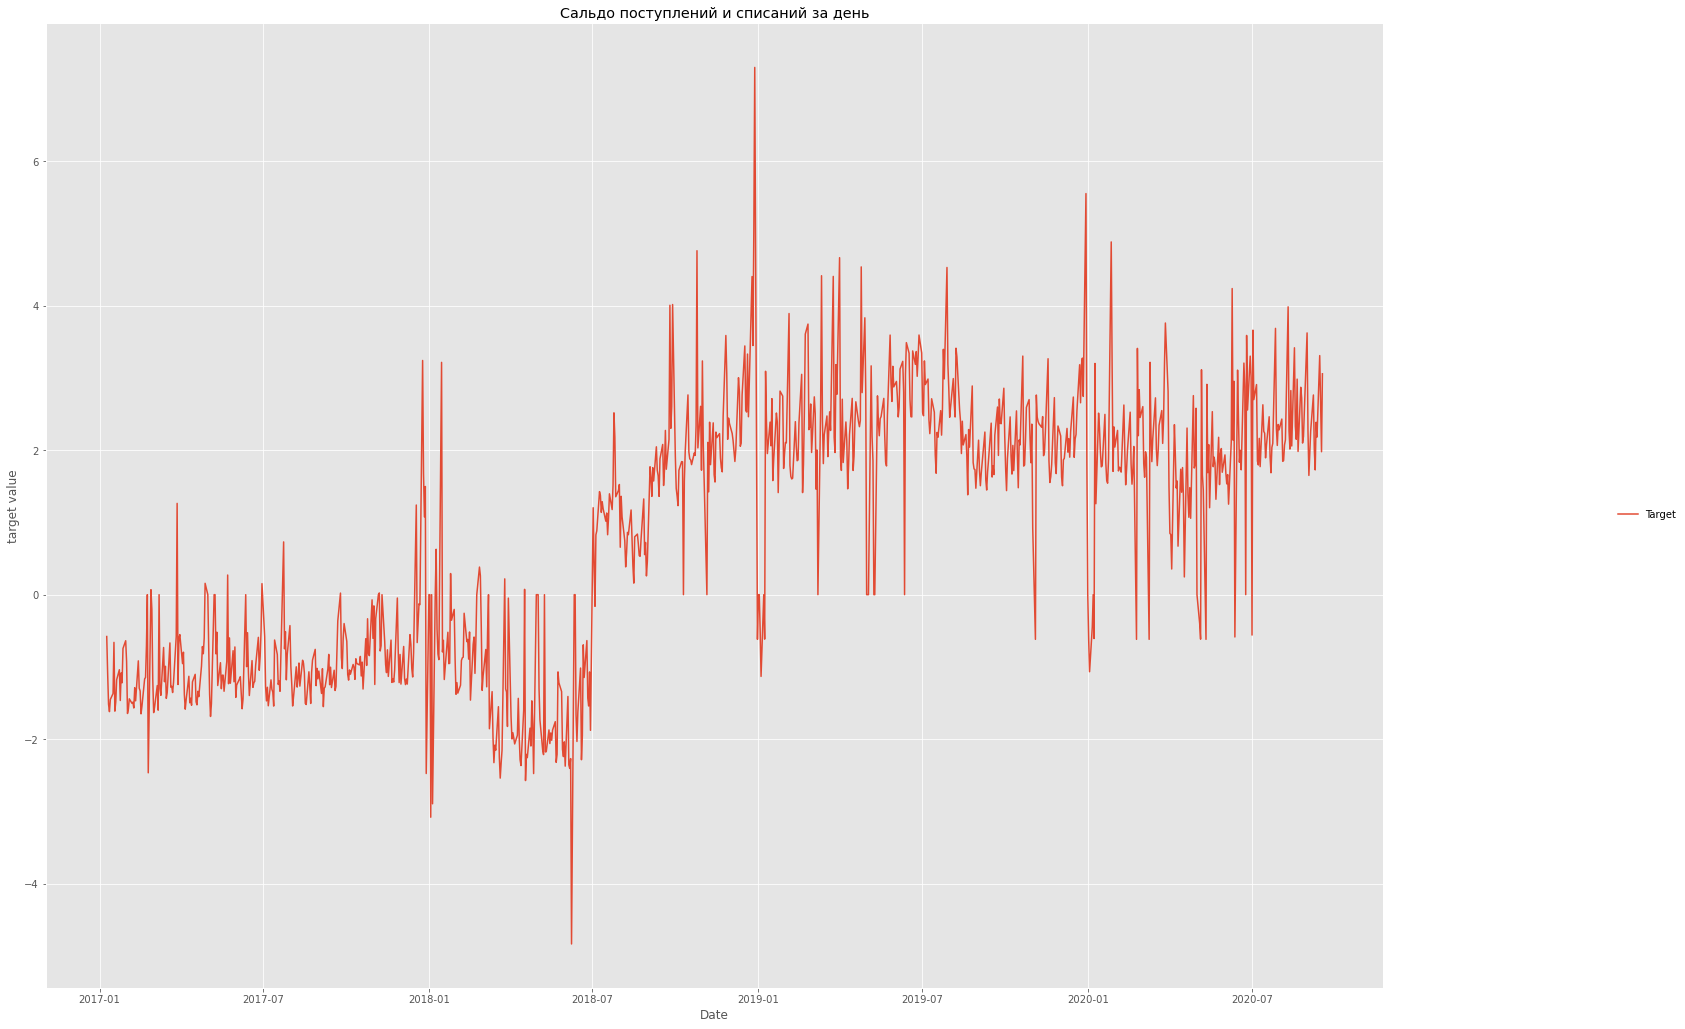

In [8]:
sns.relplot(data = df,kind = 'line')
ax = plt.gca()
ax.figure.set_size_inches(25,15)
ax.set_ylabel('target value');
ax.set_title('Сальдо поступлений и списаний за день');

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
y = df.Target

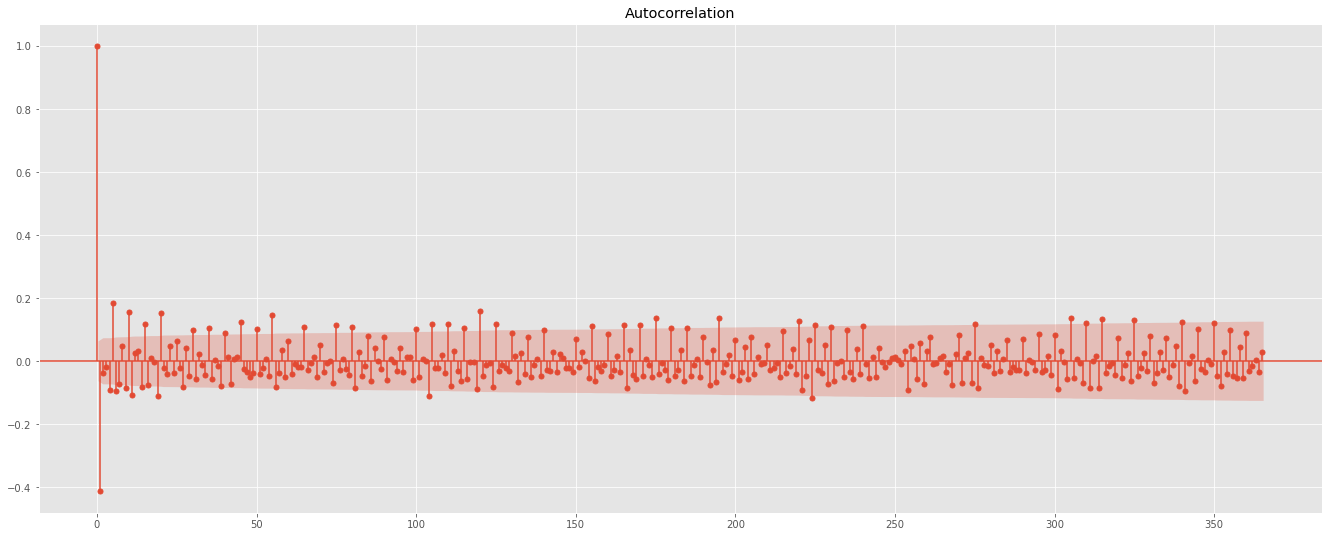

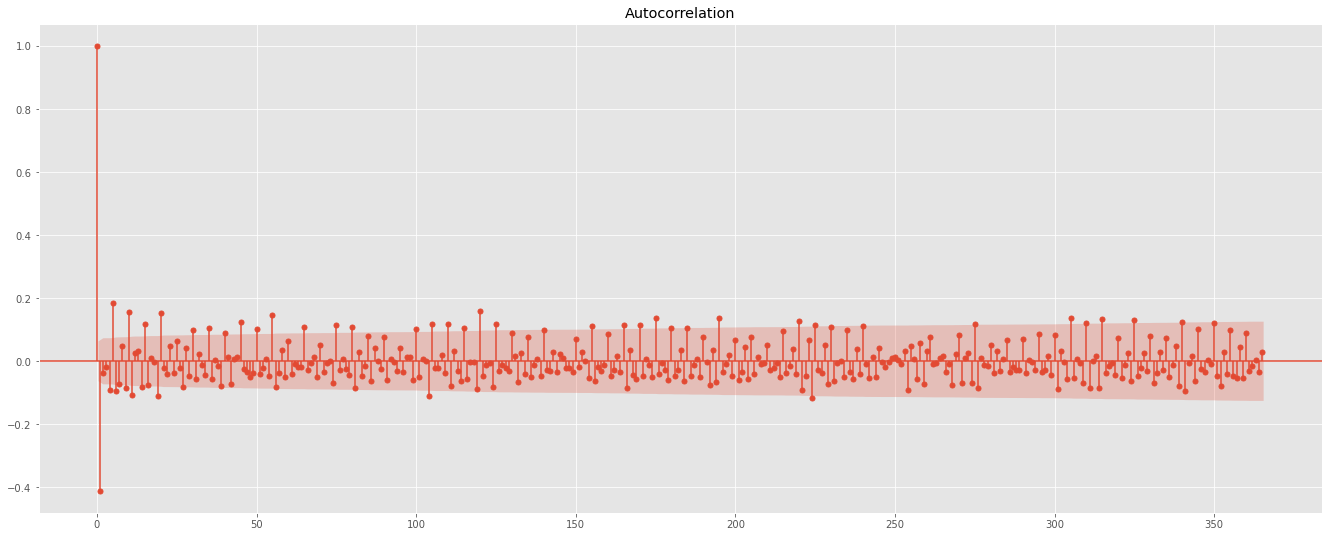

In [11]:
plot_acf(y.diff().dropna(),lags = 365)

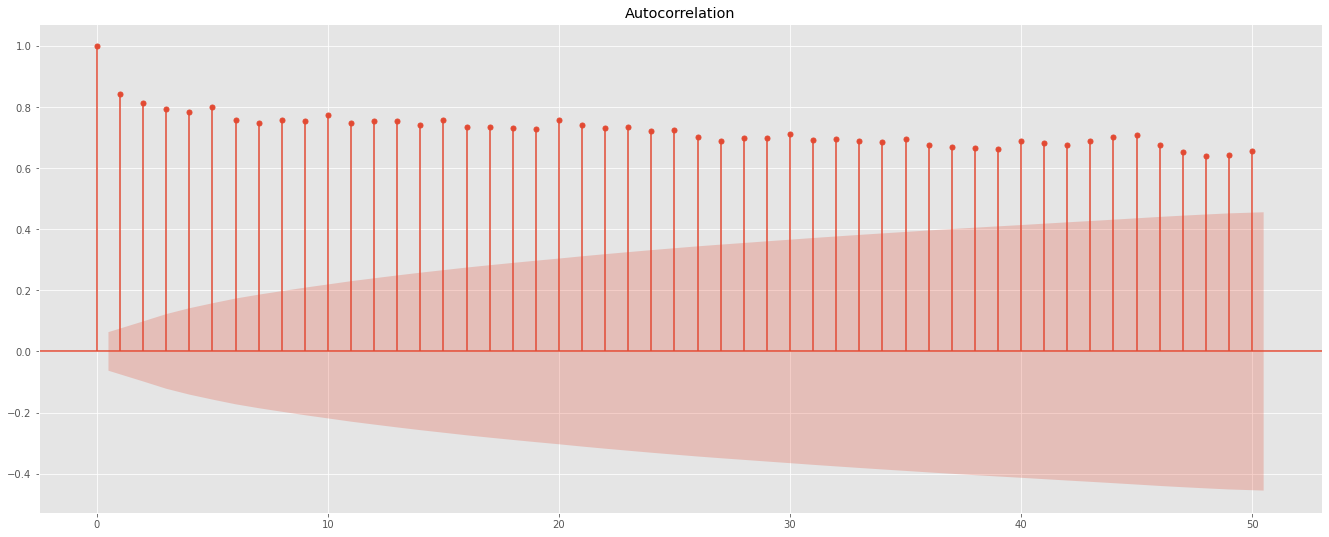

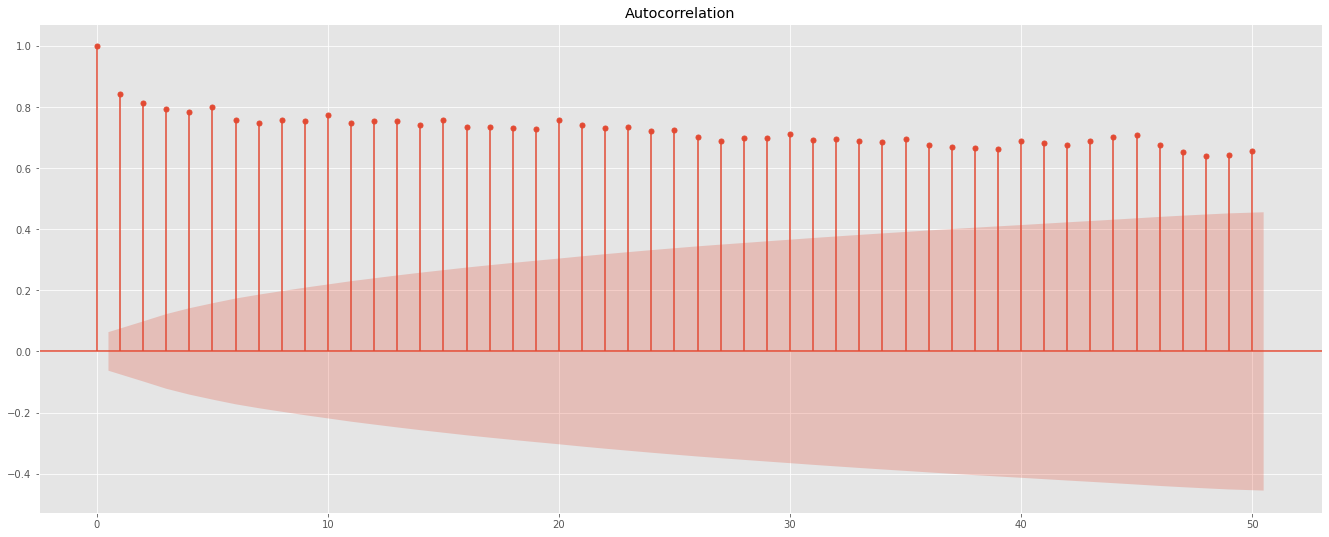

In [12]:
plot_acf(y,lags = 50)

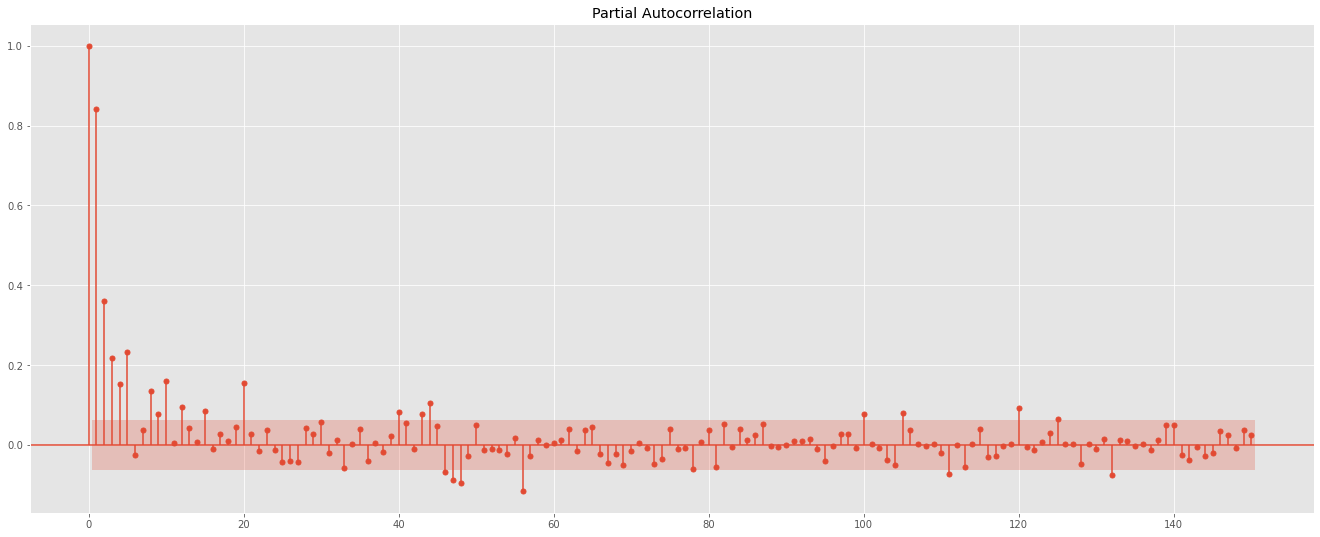

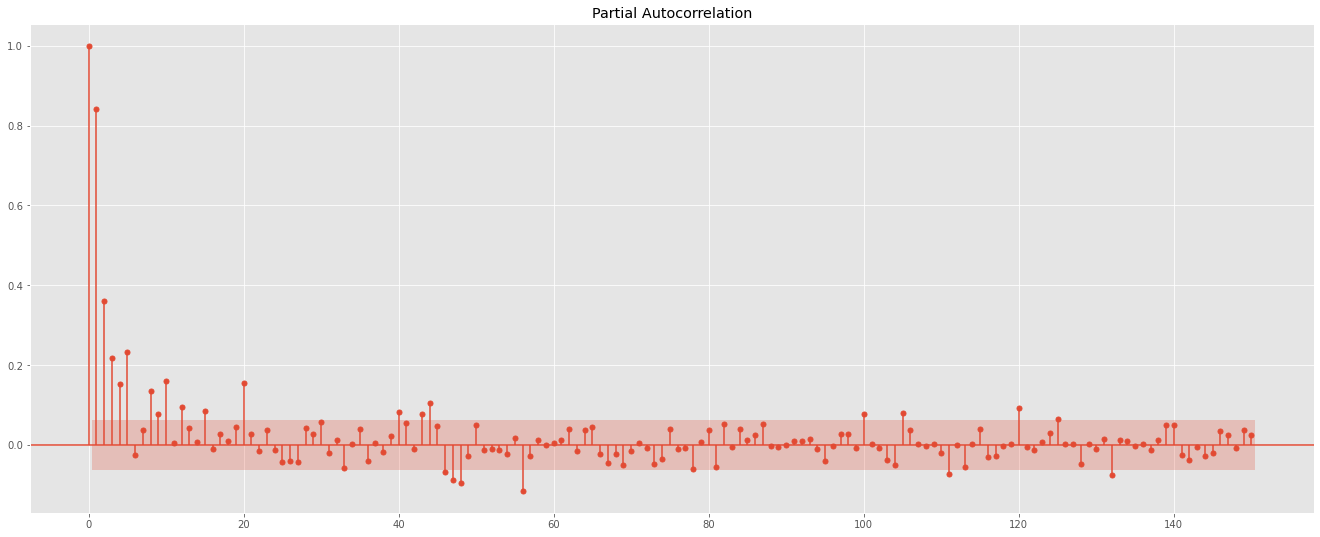

In [13]:
plot_pacf(y,lags = 150)

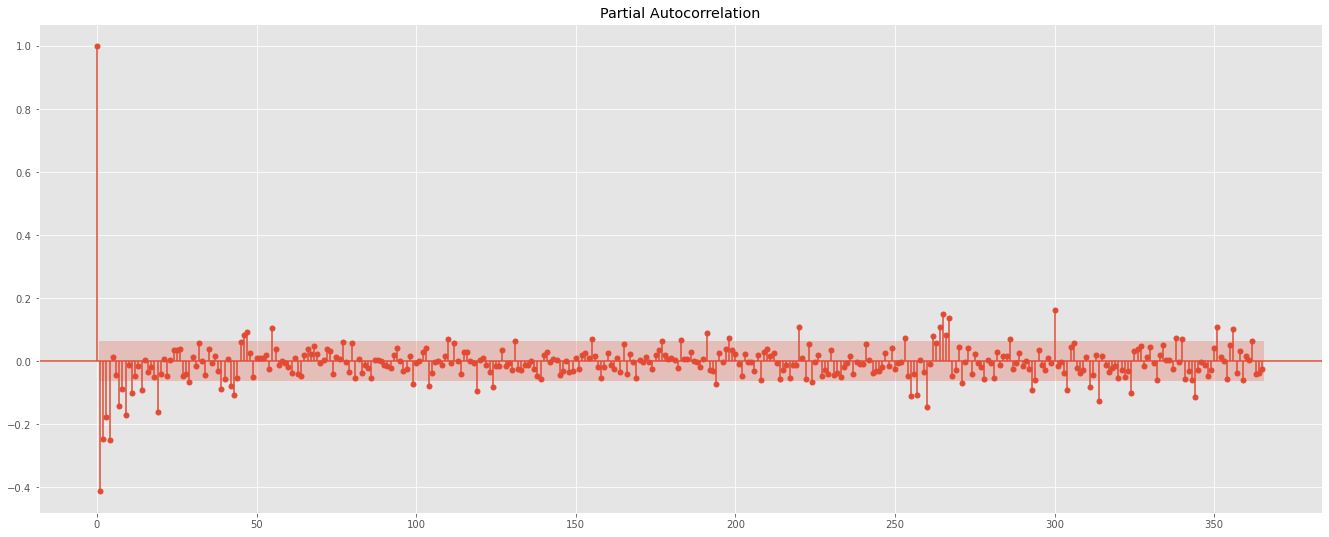

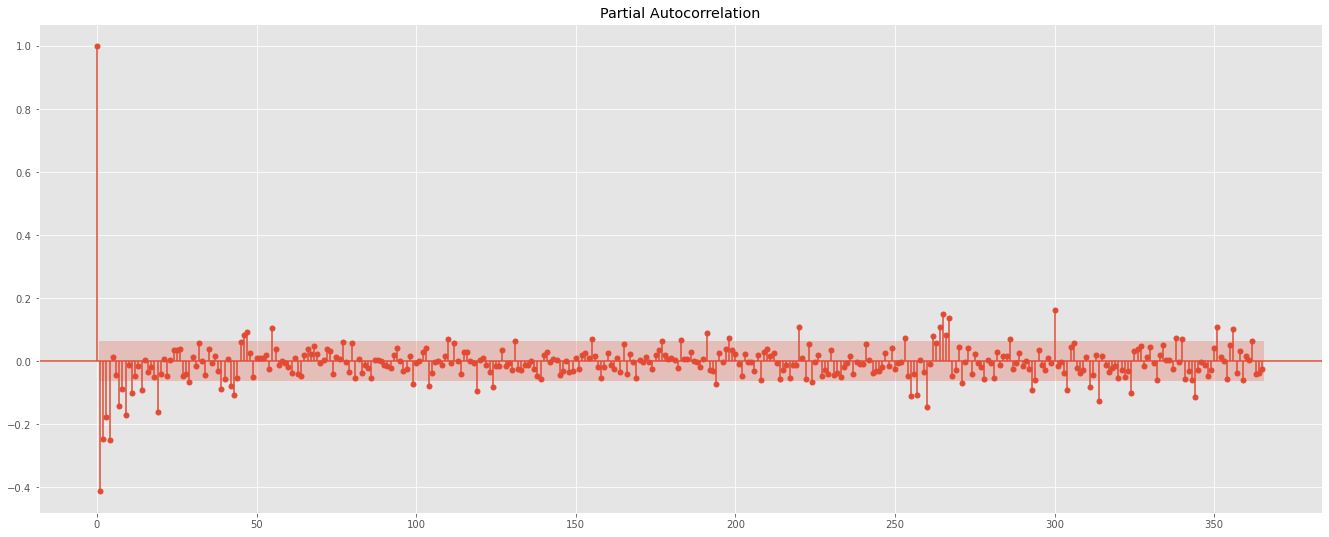

In [14]:
plot_pacf(y.diff().dropna(), lags = 365)

### Cудя по автокорреляционной функции, в данных МОЖЕТ быть сезонность (каждые пять лагов повторяется паттерн; присутствует тренд и цикличность; Ряд не является стационарным (из графика очевидно, что ожидаемое значение ряда зависит от времени)

##### 3) Генерация признаков (3 балла)

Внимание! При наличии хотя бы одной утечки в данном блоке стоимость всех пунктов делится на 2, кроме бонусного. Итого максимальный балл при наличии утечек равен 1.5 (или 2.5 при сделанном бонусе).


Создайте следующие признаки. Не забудьте лагировать необходимые фичи. Календарные фичи утечками не являются и могут даже заглядывать в будущее.

1) Календарные фичи (по 0.15 балла за пункт кроме последнего):
<ul>
<li>Индикатор того, что текущий день праздник</li>
<li>Индикатор того, что предыдущий день праздник</li>
<li>Индикатор того, что следующий день праздник </li>
<li>Индикатор того, что предыдущий день выходной</li>
<li>Индикатор того, что следующий день выходной </li>
<li>В середине ряда явно есть структурное изменение. Попробуйте придумать фичу, которая бы помогла это учесть.</li>
<li>Бонус! (1 балл) Одна из важных календарных фичей наряду с праздниками -- налоговые (бухгалтерские) дни. Найти их в удобном для чтения формате не представляется возможным, но это весьма сильная фича.</li>
</ul>

2) Лаги таргета (до 5 разных). (0.1 за все сразу вне зависимости от количества) 

3) Экзогенные фичи (по 0.5 балла каждый пункт):
<ul>
<li>Значение ключевой ставки. Можно поискать на сайте ЦБ</li>
<li>Обменнык курс доллара. Тоже есть на сайте ЦБ либо в любом другом источнике</li>
<li>Ставки Mosprime, все 7 показателей. Есть на сайте Национальной Финансовой Ассоциации</li>
</ul>

4) Придумайте сами 2 различных фичи (по 0.25 за каждую). Выбор каждой фичи кратко обоснуйте.

## Календарные фичи

In [15]:
# ༼ つ ◕_◕ ༽つ
import holidays
es_holidays = holidays.Russia()

In [16]:
df['is_holiday'] = df.index.to_series().apply(lambda x: x in es_holidays)*1

In [17]:
df['is_yesterday_holiday'] = df['is_holiday'].shift(1) * 1

In [18]:
df['is_tomorrow_holiday'] = df['is_holiday'].shift(-1) * 1

In [19]:
import calendar

In [20]:
df

,Target,is_holiday,is_yesterday_holiday,is_tomorrow_holiday
Date,,,,
2017-01-09,-0.579194,0,NaN,0.0
2017-01-10,-1.082260,0,0.0,0.0
2017-01-11,-1.515704,0,0.0,0.0
2017-01-12,-1.618853,0,0.0,0.0
2017-01-13,-1.450091,0,0.0,0.0
...,...,...,...,...
2020-09-11,2.180332,0,0.0,0.0
2020-09-14,3.307929,0,0.0,0.0
2020-09-15,2.644602,0,0.0,0.0


In [21]:
df['Date'] = pd.to_datetime(df.index)

In [22]:
df['is_yesterday_weekend'] = (df.Date.apply(lambda x: calendar.weekday(x.year,x.month,x.day)) == 0)*1

In [23]:
df['is_tomorrow_weekend'] = (df.Date.apply(lambda x: calendar.weekday(x.year,x.month,x.day)) == 4)*1

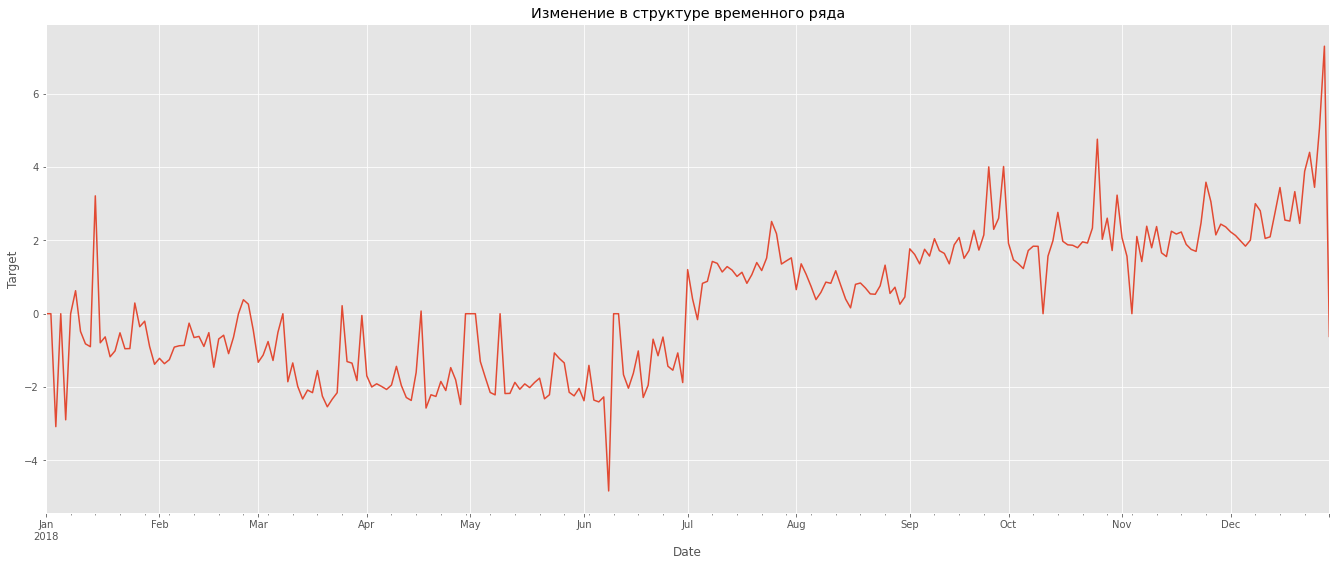

In [24]:
df['2018-01':'2018-12']['Target'].plot();
plt.title('Изменение в структуре временного ряда')
plt.ylabel('Target');

In [25]:
df['is_switch_days'] =  (df['Date'] >='2018-07-01')*1

In [26]:
df.drop('Date',axis=1, inplace=True)

## налоговые (бухгалтерские) дни

In [27]:
tax_day = pd.read_csv('tax_day.csv',sep=';') # http://www.consultant.ru/document/cons_doc_LAW_208577/

In [28]:
day = tax_day['date_x'].apply(lambda x: x[0:2])
month = tax_day['date_x'].apply(lambda x: x[3:5])
year = tax_day['date_x'].apply(lambda x: x[6:])
tax_day['date_x']= year + '-' + month + '-' + day

In [29]:
tax_day['date_x'] = pd.to_datetime(tax_day['date_x'])

In [30]:
df = df.merge(tax_day, how='left', right_on = 'date_x', left_on = df.index)

In [31]:
df.index = Index
df.drop('date_x',axis=1,inplace = True)

## Лаги таргета

In [32]:
for i in range(5):
    df['L{}'.format(i+1)] = df.Target.shift(i+1)

In [33]:
# http://www.consultant.ru/document/cons_doc_LAW_12453/886577905315979b26c9032d79cb911cc8fa7e69/ - информация об изменениях ставки

## Ключевая ставка

In [34]:
from datetime import datetime

In [35]:
# http://www.consultant.ru/document/cons_doc_LAW_12453/886577905315979b26c9032d79cb911cc8fa7e69/  
# информация об изменениях ставки
stavka = pd.read_csv('stavke.csv')

In [36]:
stavka['Date'] = pd.to_datetime(stavka['Date'])

In [37]:
stavka.index =stavka['Date']
stavka.drop('Date',axis=1,inplace=True)

In [38]:
df['date'] = Index

In [39]:
# Изменение ключевой ставки объявляется ЦБ за три дня, поэтому лагировать фичу не требуется
df = df.merge(stavka, how='left', right_on = 'Date', left_on = 'date') 

In [40]:
df['i'] = df['i'].shift(1)

In [41]:
df.index = Index
df

,Target,is_holiday,is_yesterday_holiday,is_tomorrow_holiday,is_yesterday_weekend,is_tomorrow_weekend,is_switch_days,tax_day,L1,L2,L3,L4,L5,date_x,date_y,i
Date,,,,,,,,,,,,,,,,
2017-01-09,-0.579194,0,NaN,0.0,1,0,0,1,NaN,NaN,NaN,NaN,NaN,2017-01-09,2017-01-09,NaN
2017-01-10,-1.082260,0,0.0,0.0,0,0,0,0,-0.579194,NaN,NaN,NaN,NaN,2017-01-10,2017-01-10,10.00
2017-01-11,-1.515704,0,0.0,0.0,0,0,0,0,-1.082260,-0.579194,NaN,NaN,NaN,2017-01-11,2017-01-11,10.00
2017-01-12,-1.618853,0,0.0,0.0,0,0,0,0,-1.515704,-1.082260,-0.579194,NaN,NaN,2017-01-12,2017-01-12,10.00
2017-01-13,-1.450091,0,0.0,0.0,0,1,0,1,-1.618853,-1.515704,-1.082260,-0.579194,NaN,2017-01-13,2017-01-13,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-11,2.180332,0,0.0,0.0,0,1,1,0,2.385552,1.726324,2.008578,2.762902,2.265766,2020-09-11,2020-09-11,4.25
2020-09-14,3.307929,0,0.0,0.0,1,0,1,1,2.180332,2.385552,1.726324,2.008578,2.762902,2020-09-14,2020-09-14,4.25
2020-09-15,2.644602,0,0.0,0.0,0,0,1,1,3.307929,2.180332,2.385552,1.726324,2.008578,2020-09-15,2020-09-15,4.25


## Курс доллара

In [42]:
usd = pd.read_csv('USD.csv',sep = ';') # https://www.finam.ru/profile/kurs-rublya/usd-from-cb/export/

In [43]:
usd['<DATE>'] = usd['<DATE>'].apply(lambda x: '{}'.format(x))

In [44]:
usd

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,USDCB,D,20170110,0,59.8961,59.8961,59.8961,59.8961,0
1,USDCB,D,20170111,0,59.9533,59.9533,59.9533,59.9533,0
2,USDCB,D,20170112,0,60.1614,60.1614,60.1614,60.1614,0
3,USDCB,D,20170113,0,59.4978,59.4978,59.4978,59.4978,0
4,USDCB,D,20170114,0,59.3700,59.3700,59.3700,59.3700,0
...,...,...,...,...,...,...,...,...,...
904,USDCB,D,20200911,0,75.5274,75.5274,75.5274,75.5274,0
905,USDCB,D,20200912,0,74.8896,74.8896,74.8896,74.8896,0
906,USDCB,D,20200915,0,74.7148,74.7148,74.7148,74.7148,0
907,USDCB,D,20200916,0,75.1884,75.1884,75.1884,75.1884,0


In [45]:
year = usd['<DATE>'].apply(lambda x: x[0:4])
month = usd['<DATE>'].apply(lambda x: x[4:6])
day = usd['<DATE>'].apply(lambda x: x[6:])

In [46]:
usd['date'] = year + '-' + month + '-' + day

In [47]:
usd['Date']=pd.to_datetime(usd['date'])

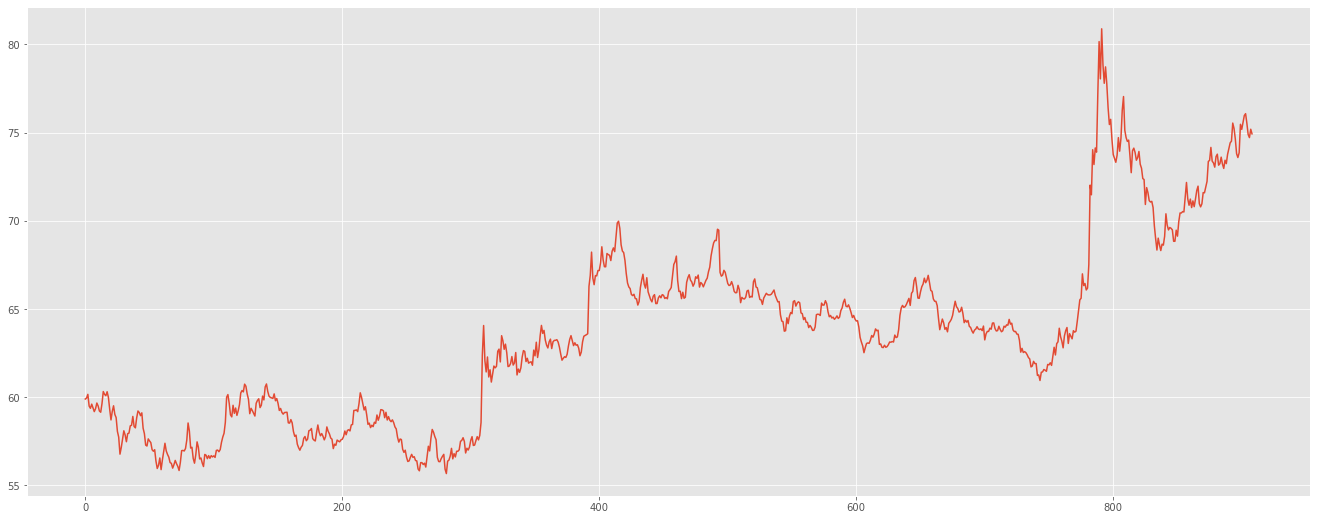

In [48]:
# https://www.finam.ru/profile/kurs-rublya/usd-from-cb/export/
usd['<CLOSE>'].plot();

In [49]:
df

,Target,is_holiday,is_yesterday_holiday,is_tomorrow_holiday,is_yesterday_weekend,is_tomorrow_weekend,is_switch_days,tax_day,L1,L2,L3,L4,L5,date_x,date_y,i
Date,,,,,,,,,,,,,,,,
2017-01-09,-0.579194,0,NaN,0.0,1,0,0,1,NaN,NaN,NaN,NaN,NaN,2017-01-09,2017-01-09,NaN
2017-01-10,-1.082260,0,0.0,0.0,0,0,0,0,-0.579194,NaN,NaN,NaN,NaN,2017-01-10,2017-01-10,10.00
2017-01-11,-1.515704,0,0.0,0.0,0,0,0,0,-1.082260,-0.579194,NaN,NaN,NaN,2017-01-11,2017-01-11,10.00
2017-01-12,-1.618853,0,0.0,0.0,0,0,0,0,-1.515704,-1.082260,-0.579194,NaN,NaN,2017-01-12,2017-01-12,10.00
2017-01-13,-1.450091,0,0.0,0.0,0,1,0,1,-1.618853,-1.515704,-1.082260,-0.579194,NaN,2017-01-13,2017-01-13,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-11,2.180332,0,0.0,0.0,0,1,1,0,2.385552,1.726324,2.008578,2.762902,2.265766,2020-09-11,2020-09-11,4.25
2020-09-14,3.307929,0,0.0,0.0,1,0,1,1,2.180332,2.385552,1.726324,2.008578,2.762902,2020-09-14,2020-09-14,4.25
2020-09-15,2.644602,0,0.0,0.0,0,0,1,1,3.307929,2.180332,2.385552,1.726324,2.008578,2020-09-15,2020-09-15,4.25


In [50]:
df = df.merge(usd[['Date','<CLOSE>']],how ='left',right_on='Date',left_on = 'date_x')

In [51]:
# залагируем фичу поскольку дневное значение показателя считается доступным после закрытия торгов
df['<CLOSE>'] = df['<CLOSE>'].shift(1)

In [52]:
df.index = Index

## MOSPRIME индекс

In [53]:
mospr = pd.read_csv('MOSPR.csv',sep=';' , encoding='latin-1')

In [54]:
mospr.dtypes

Date    object
ON      object
1W      object
2W      object
1M      object
2M      object
3M      object
6M      object
dtype: object

In [55]:
mospr['ON'][(mospr['ON']=='-')] ='NaN'
mospr['ON'][(mospr['ON']=='\x96')] ='NaN'

In [56]:
for col in mospr.columns[1:]:
    mospr[col]=mospr[col].apply(lambda x: x.replace(',','.'))
    mospr[col][(mospr[col] == 'NaN')] = np.nan 
    mospr[col]=mospr[col].apply(lambda x: float(x))

<ipython-input-56-3ea1dda69f9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mospr[col][(mospr[col] == 'NaN')] = np.nan


In [57]:
day = mospr['Date'].apply(lambda x: x[0:2])
month = mospr['Date'].apply(lambda x: x[3:5])
year = mospr['Date'].apply(lambda x: x[6:])
mospr['Date']= year + '-' + month + '-' + day

In [58]:
mospr

,Date,ON,1W,2W,1M,2M,3M,6M
0,2020-09-17,4.42,4.46,4.46,4.50,4.55,4.63,4.66
1,2020-09-16,4.41,4.46,4.46,4.50,4.55,4.63,4.66
2,2020-09-15,4.37,4.45,4.45,4.50,4.55,4.63,4.66
3,2020-09-14,4.36,4.44,4.44,4.49,4.55,4.63,4.66
4,2020-09-11,4.36,4.45,4.46,4.50,4.56,4.65,4.67
...,...,...,...,...,...,...,...,...
903,2017-01-13,10.27,10.40,10.45,10.51,10.58,10.59,10.59
904,2017-01-12,10.23,10.42,10.48,10.53,10.59,10.59,10.59
905,2017-01-11,10.23,10.40,10.48,10.53,10.59,10.59,10.59
906,2017-01-10,10.21,10.40,10.48,10.53,10.59,10.59,10.59


In [59]:
mospr['Date'] = pd.to_datetime(mospr['Date'])

In [60]:
mospr = mospr[::-1]

In [61]:
mospr

,Date,ON,1W,2W,1M,2M,3M,6M
907,2017-01-09,10.46,10.44,10.47,10.52,10.58,10.58,10.58
906,2017-01-10,10.21,10.40,10.48,10.53,10.59,10.59,10.59
905,2017-01-11,10.23,10.40,10.48,10.53,10.59,10.59,10.59
904,2017-01-12,10.23,10.42,10.48,10.53,10.59,10.59,10.59
903,2017-01-13,10.27,10.40,10.45,10.51,10.58,10.59,10.59
...,...,...,...,...,...,...,...,...
4,2020-09-11,4.36,4.45,4.46,4.50,4.56,4.65,4.67
3,2020-09-14,4.36,4.44,4.44,4.49,4.55,4.63,4.66
2,2020-09-15,4.37,4.45,4.45,4.50,4.55,4.63,4.66
1,2020-09-16,4.41,4.46,4.46,4.50,4.55,4.63,4.66


In [62]:
df = df.merge(mospr, how='left',right_on = 'Date', left_on = 'date_x')

In [63]:
df.drop('Date_x',axis = 1, inplace = True)

In [64]:
df.index = Index

In [65]:
# Лагируем фичу, чтобы избежать подглядывания в будущее
df[mospr.columns[1:]] = df[mospr.columns[1:]].shift(1) 

In [66]:
df = df.rename({'<CLOSE>':'USD'},axis = 1)

## Собственные признаки

### Цена нефти на мировом рынке сильно влияет на экономическую ситуацию в России, и, как следствие, на сальдо поступлений и списаний за день

In [67]:
brent = pd.read_csv('Brent.csv')[::-1]

In [68]:
day = brent['Дата'].apply(lambda x: x[0:2])
month = brent['Дата'].apply(lambda x: x[3:5])
year = brent['Дата'].apply(lambda x: x[6:])
brent['Дата']= year + '-' + month + '-' + day

In [69]:
brent['data_b'] = pd.to_datetime(brent['Дата'])

In [70]:
brent['oil_price'] = brent['Цена'].apply(lambda x: float(x.replace(',','.')))

In [71]:
df = df.merge(brent[['oil_price','data_b']], how = 'left', right_on = 'data_b', left_index = True).drop('data_b',axis = 1)

In [72]:
df.index = Index

In [73]:
# лагируем фичу, так как цена нефти за день становится 'общеизвестна' "завтра".
df['oil_price'] = df['oil_price'].shift(1)

## Возьмем продифференцированный таргет, чтобы отразить информацию о том, как динамика изменения таргета влияет на значения таргета (и не забудем залагировать, так как при дифференцировании используется значение таргета в этот же момент времени)

In [74]:
df['diff_1']=df['Target'].diff(1).shift(1)
df

,Target,is_holiday,is_yesterday_holiday,is_tomorrow_holiday,is_yesterday_weekend,is_tomorrow_weekend,is_switch_days,tax_day,L1,L2,...,Date_y,ON,1W,2W,1M,2M,3M,6M,oil_price,diff_1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-09,-0.579194,0,NaN,0.0,1,0,0,1,NaN,NaN,...,2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,-1.082260,0,0.0,0.0,0,0,0,0,-0.579194,NaN,...,2017-01-10,10.46,10.44,10.47,10.52,10.58,10.58,10.58,54.94,NaN
2017-01-11,-1.515704,0,0.0,0.0,0,0,0,0,-1.082260,-0.579194,...,2017-01-11,10.21,10.40,10.48,10.53,10.59,10.59,10.59,53.64,-0.503067
2017-01-12,-1.618853,0,0.0,0.0,0,0,0,0,-1.515704,-1.082260,...,2017-01-12,10.23,10.40,10.48,10.53,10.59,10.59,10.59,55.10,-0.433444
2017-01-13,-1.450091,0,0.0,0.0,0,1,0,1,-1.618853,-1.515704,...,2017-01-13,10.23,10.42,10.48,10.53,10.59,10.59,10.59,56.01,-0.103149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-11,2.180332,0,0.0,0.0,0,1,1,0,2.385552,1.726324,...,2020-09-11,4.36,4.45,4.45,4.52,4.57,4.66,4.68,40.06,0.659228
2020-09-14,3.307929,0,0.0,0.0,1,0,1,1,2.180332,2.385552,...,2020-09-14,4.36,4.45,4.46,4.50,4.56,4.65,4.67,39.83,-0.205219
2020-09-15,2.644602,0,0.0,0.0,0,0,1,1,3.307929,2.180332,...,2020-09-15,4.36,4.44,4.44,4.49,4.55,4.63,4.66,39.61,1.127597


## Заполним пропущенные значения

In [75]:
df['oil_price']=df['oil_price'].interpolate(method='linear')

In [76]:
df['USD']=df['USD'].interpolate(method='linear')

In [77]:
for col in mospr.columns[1:]:
    df[col] = df[col].interpolate(method='linear')

In [78]:
df.index = pd.to_datetime(df.index)

In [79]:
df.isna().sum()

Target                   0
is_holiday               0
is_yesterday_holiday     1
is_tomorrow_holiday      1
is_yesterday_weekend     0
is_tomorrow_weekend      0
is_switch_days           0
tax_day                  0
L1                       1
L2                       2
L3                       3
L4                       4
L5                       5
date_x                   0
date_y                   0
i                        1
USD                      2
Date_y                  59
ON                       1
1W                       1
2W                       1
1M                       1
2M                       1
3M                       1
6M                       1
oil_price                1
diff_1                   2
dtype: int64

In [80]:
df.drop(['date_x','date_y','Date_y'],axis=1,inplace=True)

In [81]:
df_1 = df[5:-1]

In [82]:
df_1.isna().sum()

Target                  0
is_holiday              0
is_yesterday_holiday    0
is_tomorrow_holiday     0
is_yesterday_weekend    0
is_tomorrow_weekend     0
is_switch_days          0
tax_day                 0
L1                      0
L2                      0
L3                      0
L4                      0
L5                      0
i                       0
USD                     0
ON                      0
1W                      0
2W                      0
1M                      0
2M                      0
3M                      0
6M                      0
oil_price               0
diff_1                  0
dtype: int64

##### 4) Одношаговое прогнозирование (1 балл)

Внимание! Запрещается пользоваться функцией make_reduction из sktime. Пункты Регрессия и Бенчмарк не будут засчитаны! 

4.1) Предобработка (0.3 балла)

Разбейте полученные данные на трейн и тест по времени. Размер теста: 0.2. Если необходимо, отнормируйте данные. Если необходимо, закодируйте категориальные фичи любым валидным методом.

In [83]:
from sktime.forecasting.all import temporal_train_test_split

In [84]:
# ༼ つ ◕_◕ ༽つ
y_train, y_test,X_train, X_test = temporal_train_test_split(y = df_1['Target'], X=df_1.drop(['Target'],axis=1), test_size=0.2)

4.2) Регрессия (0.3 балла)

Выберите ваш любимый регрессор и решите задачу одношагового прогнозирования. При необходимости подберите гиперпараметры. Кросс-валидацию мы ещё пройти не успели, поэтому можно отбирать параметры на тесте, держа в голове, что так делать не очень хорошо. Подсчитайте качество одношаговых прогнозов. Метрика -- MAPE. 

In [85]:
# ༼ つ ◕_◕ ༽つ
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [86]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [87]:
alphas = np.linspace(0,0.1,100)

In [88]:
results = []
for alpha in alphas:
    reg = Ridge(alpha)
    reg.fit(X_train_sc, y_train)
    results.append(np.array([MAPE(y_test,reg.predict(X_test_sc)),alpha]))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.4212e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [89]:
alpha_opt = results[np.argmin(results)][1]

In [90]:
reg = Ridge(alpha_opt)
reg.fit(X_train_sc, y_train)
y_pred = reg.predict(X_test_sc)

In [91]:
MAPE(y_test[y_test!=0],y_pred[y_test!=0])

0.45212939820084613

In [92]:
y_pred = pd.DataFrame({'y_pred':y_pred}, index = y_test.index)

4.3) Бенчмарк (0.3 балла)

Постройте прогноз с помощью наивной модели. Наивная модель в качестве прогноза возвращает последнее доступное на текущий момент значение из трейна (по сути, фичу первого лага таргета). Подсчитайте качество такого прогноза и сравните с вашей моделью. Если вы всё сделали правильно, то должно получиться как минимум не хуже. С налоговыми датами почти наверное получится лучше.




In [93]:
# ༼ つ ◕_◕ ༽つ
bench = X_test.L1

In [94]:
MAPE(y_test[y_test!=0],bench[y_test!=0])

0.5009204427663012

In [95]:
y_pred['bench'] = bench

4.4) Визуализация (0.1 балла)

Визуализируйте на одном графике тестовые данные, прогноз вашей модели и прогноз наивной модели. Подпишите все оси.

In [96]:
y_pred['y_test'] = y_test

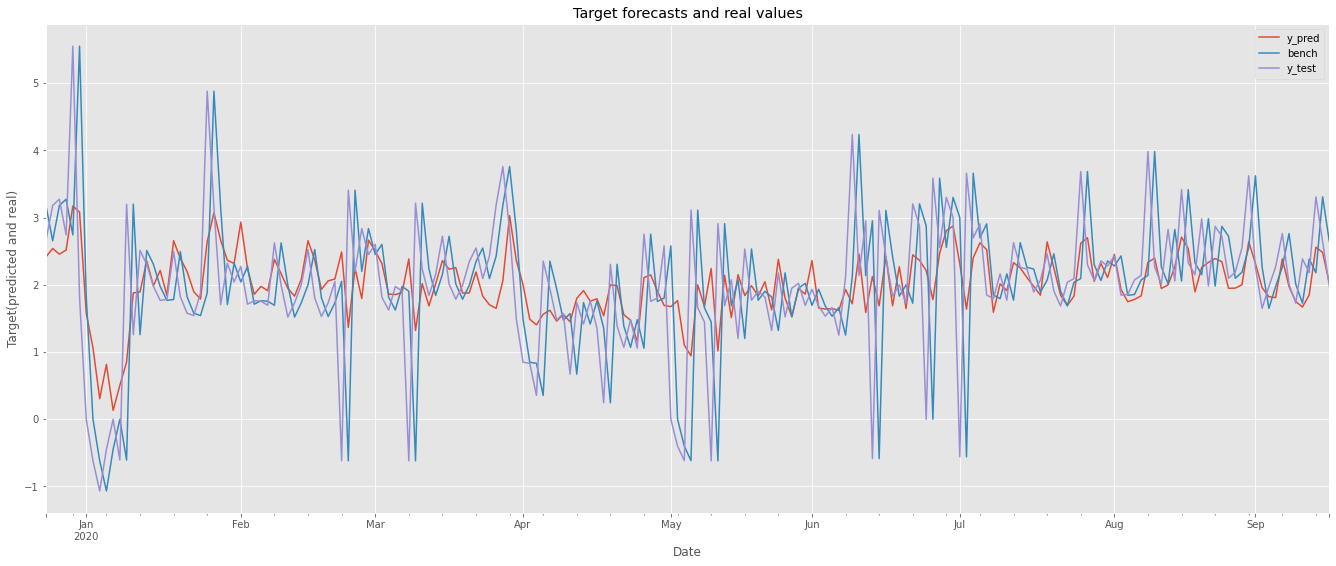

In [97]:
# ༼ つ ◕_◕ ༽つ
y_pred.plot()
plt.ylabel('Target(predicted and real)')
plt.title('Target forecasts and real values');

##### Бонус! 

+ +1 балл за MAPE на тесте ниже 0.25. Не засчитывается при наличии утечек в данных.
+ +2 балла за MAPE на тесте ниже 0.20. Не засчитывается при наличии утечек в данных.

Если необходимо, можете добавить новые фичи, но в зачёт блока генерации фичей они не пойдут.

##### 5) Повтор препроцессинга (0 баллов)

Повторите разбиение на трейн и тест. Размер теста: 15 наблюдений. Оставьте в модели только календарные фичи и лаги таргета. Повторите нормирование и энкодинг, если делали их ранее и если это необходимо. 

In [98]:
# ༼ つ ◕_◕ ༽つ
df_2 = df_1[df_1.columns[0:12]]

In [99]:
y_train, y_test,X_train, X_test = temporal_train_test_split(y = df_2['Target'], X=df_2.drop(['Target'],axis=1), test_size=15/963)

In [100]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
alphas = np.linspace(0,10,100)
results = []
for alpha in alphas:
    reg = Ridge(alpha)
    reg.fit(X_train, y_train)
    results.append(np.array([MAPE(y_test,reg.predict(X_test)),alpha]))

In [102]:
alpha_opt = results[np.argmin(results)][1]
reg = Ridge(alpha_opt)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y = pd.DataFrame({'y_pred':y_pred},index = y_test.index)
print(MAPE(y_test,y_pred))

0.12830362118536695


In [103]:
bench = df_2[-15:].L1
print(MAPE(y_test,bench))
y['bench'] = bench
y['y_test'] = y_test

0.25082726828620583


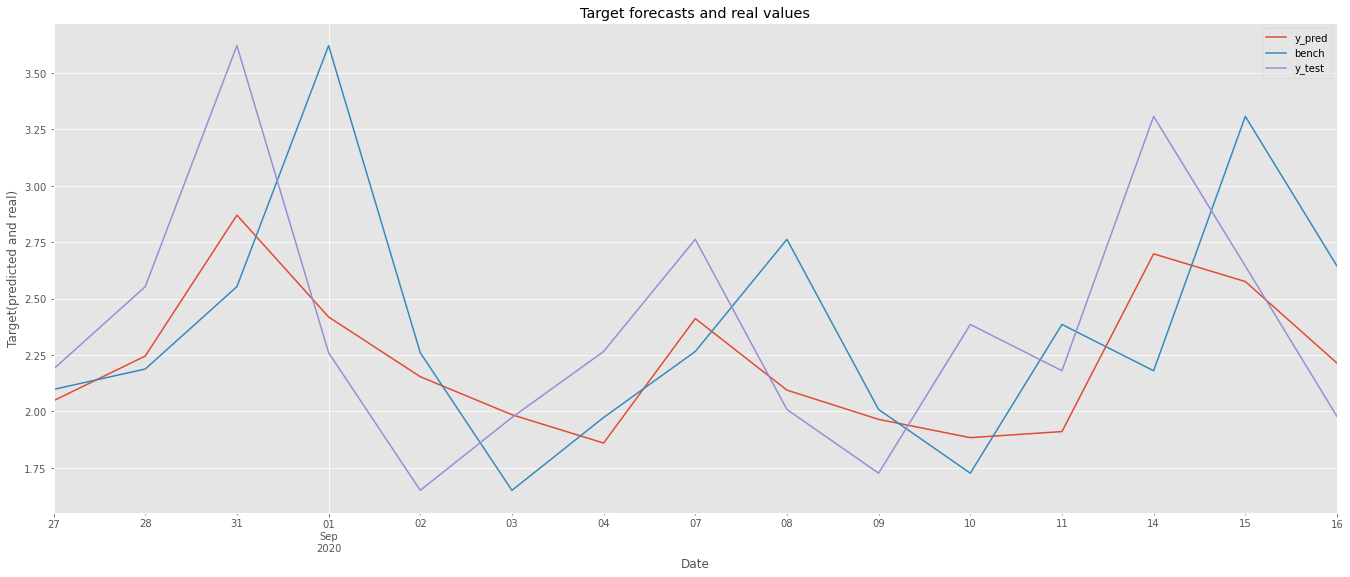

In [104]:
y.plot();
plt.ylabel('Target(predicted and real)')
plt.title('Target forecasts and real values');

##### 6) Рекурсивная стратегия (2.5 балла)

Внимание! Запрещается пользоваться функцией make_reduction из sktime. Рекурсивную стратегию необходимо написать вручную!

 Реализуйте рекурсивное прогнозирование на 15 шагов с помощью вашей любимой регрессионной модели.

In [105]:
# ༼ つ ◕_◕ ༽つ
def make_reduction(method, df_train, df_test, period):
    df_train['L1']  = df_train['Target'].shift(1)
    method.fit(df_train.drop('Target',axis=1)[1:],df_train['Target'][1:])
    y_tr = np.array([np.nan]*len(period))
    y_tr[0] = df_train['Target'][-1]
    df_test['L1'] = y_tr
    y_pred = np.array([np.nan]*len(period))
    i = 0
    for t in range(0,len(period)):
        y_pred[t] = method.predict(df_test.iloc[t])
        if i < 14 :   
            df_test['L1'][t+1] = y_pred[t]
            i+=1
    return y_pred

In [106]:
y_train, y_test = temporal_train_test_split(y = df_2[df_2.columns[:8]], test_size=15)

In [107]:
from catboost import CatBoostRegressor

In [108]:
predict = make_reduction(method = CatBoostRegressor(n_estimators=1000,
                         learning_rate=0.2,
                         loss_function='MAPE'),
               df_train = y_train,
               df_test = y_test.drop('Target',axis=1),
               period = y_test.index)

0:	learn: 0.7414587	total: 137ms	remaining: 2m 16s
1:	learn: 0.6224679	total: 139ms	remaining: 1m 9s
2:	learn: 0.5354363	total: 141ms	remaining: 46.8s
3:	learn: 0.4626222	total: 143ms	remaining: 35.6s
4:	learn: 0.4078657	total: 145ms	remaining: 28.9s
5:	learn: 0.3646102	total: 148ms	remaining: 24.5s
6:	learn: 0.3324970	total: 151ms	remaining: 21.4s
7:	learn: 0.3077619	total: 152ms	remaining: 18.9s
8:	learn: 0.2916130	total: 154ms	remaining: 17s
9:	learn: 0.2858016	total: 155ms	remaining: 15.4s
10:	learn: 0.2759123	total: 157ms	remaining: 14.1s
11:	learn: 0.2694201	total: 159ms	remaining: 13.1s
12:	learn: 0.2661377	total: 161ms	remaining: 12.2s
13:	learn: 0.2645066	total: 162ms	remaining: 11.4s
14:	learn: 0.2603776	total: 164ms	remaining: 10.8s
15:	learn: 0.2587591	total: 166ms	remaining: 10.2s
16:	learn: 0.2581412	total: 168ms	remaining: 9.72s
17:	learn: 0.2579534	total: 170ms	remaining: 9.27s
18:	learn: 0.2565736	total: 172ms	remaining: 8.88s
19:	learn: 0.2564628	total: 174ms	remainin

202:	learn: 0.2045419	total: 597ms	remaining: 2.34s
203:	learn: 0.2043046	total: 599ms	remaining: 2.34s
204:	learn: 0.2042068	total: 601ms	remaining: 2.33s
205:	learn: 0.2041126	total: 603ms	remaining: 2.32s
206:	learn: 0.2036480	total: 607ms	remaining: 2.32s
207:	learn: 0.2036658	total: 609ms	remaining: 2.32s
208:	learn: 0.2035762	total: 611ms	remaining: 2.31s
209:	learn: 0.2035253	total: 612ms	remaining: 2.3s
210:	learn: 0.2034886	total: 614ms	remaining: 2.3s
211:	learn: 0.2032899	total: 616ms	remaining: 2.29s
212:	learn: 0.2032478	total: 618ms	remaining: 2.28s
213:	learn: 0.2031995	total: 621ms	remaining: 2.28s
214:	learn: 0.2031641	total: 623ms	remaining: 2.27s
215:	learn: 0.2029930	total: 625ms	remaining: 2.27s
216:	learn: 0.2028468	total: 627ms	remaining: 2.26s
217:	learn: 0.2027962	total: 629ms	remaining: 2.26s
218:	learn: 0.2027554	total: 631ms	remaining: 2.25s
219:	learn: 0.2026866	total: 634ms	remaining: 2.25s
220:	learn: 0.2026722	total: 637ms	remaining: 2.24s
221:	learn: 0.

402:	learn: 0.1937488	total: 1.07s	remaining: 1.58s
403:	learn: 0.1936268	total: 1.07s	remaining: 1.58s
404:	learn: 0.1935292	total: 1.07s	remaining: 1.57s
405:	learn: 0.1935058	total: 1.08s	remaining: 1.57s
406:	learn: 0.1934987	total: 1.08s	remaining: 1.57s
407:	learn: 0.1934931	total: 1.08s	remaining: 1.57s
408:	learn: 0.1934901	total: 1.08s	remaining: 1.57s
409:	learn: 0.1934858	total: 1.09s	remaining: 1.56s
410:	learn: 0.1934708	total: 1.09s	remaining: 1.56s
411:	learn: 0.1934160	total: 1.09s	remaining: 1.56s
412:	learn: 0.1934116	total: 1.09s	remaining: 1.55s
413:	learn: 0.1933493	total: 1.09s	remaining: 1.55s
414:	learn: 0.1933461	total: 1.1s	remaining: 1.55s
415:	learn: 0.1933435	total: 1.1s	remaining: 1.54s
416:	learn: 0.1933460	total: 1.1s	remaining: 1.54s
417:	learn: 0.1933072	total: 1.1s	remaining: 1.54s
418:	learn: 0.1933167	total: 1.11s	remaining: 1.53s
419:	learn: 0.1933078	total: 1.11s	remaining: 1.53s
420:	learn: 0.1932519	total: 1.11s	remaining: 1.53s
421:	learn: 0.19

603:	learn: 0.1879861	total: 1.54s	remaining: 1.01s
604:	learn: 0.1879770	total: 1.54s	remaining: 1s
605:	learn: 0.1879721	total: 1.54s	remaining: 1s
606:	learn: 0.1879855	total: 1.54s	remaining: 1000ms
607:	learn: 0.1877166	total: 1.55s	remaining: 997ms
608:	learn: 0.1877079	total: 1.55s	remaining: 994ms
609:	learn: 0.1877005	total: 1.55s	remaining: 993ms
610:	learn: 0.1876939	total: 1.55s	remaining: 990ms
611:	learn: 0.1876855	total: 1.56s	remaining: 987ms
612:	learn: 0.1876769	total: 1.56s	remaining: 984ms
613:	learn: 0.1876763	total: 1.56s	remaining: 981ms
614:	learn: 0.1876710	total: 1.56s	remaining: 978ms
615:	learn: 0.1876832	total: 1.56s	remaining: 976ms
616:	learn: 0.1876777	total: 1.57s	remaining: 973ms
617:	learn: 0.1876745	total: 1.57s	remaining: 970ms
618:	learn: 0.1876708	total: 1.57s	remaining: 967ms
619:	learn: 0.1876715	total: 1.57s	remaining: 965ms
620:	learn: 0.1876580	total: 1.57s	remaining: 962ms
621:	learn: 0.1876852	total: 1.58s	remaining: 959ms
622:	learn: 0.187

811:	learn: 0.1842520	total: 2.01s	remaining: 466ms
812:	learn: 0.1842518	total: 2.01s	remaining: 463ms
813:	learn: 0.1842517	total: 2.02s	remaining: 461ms
814:	learn: 0.1842492	total: 2.02s	remaining: 458ms
815:	learn: 0.1841906	total: 2.02s	remaining: 456ms
816:	learn: 0.1841930	total: 2.02s	remaining: 453ms
817:	learn: 0.1841861	total: 2.02s	remaining: 451ms
818:	learn: 0.1841255	total: 2.03s	remaining: 448ms
819:	learn: 0.1841308	total: 2.03s	remaining: 446ms
820:	learn: 0.1841308	total: 2.03s	remaining: 443ms
821:	learn: 0.1841277	total: 2.03s	remaining: 440ms
822:	learn: 0.1841126	total: 2.04s	remaining: 438ms
823:	learn: 0.1841358	total: 2.04s	remaining: 435ms
824:	learn: 0.1841340	total: 2.04s	remaining: 433ms
825:	learn: 0.1841254	total: 2.04s	remaining: 430ms
826:	learn: 0.1841216	total: 2.04s	remaining: 428ms
827:	learn: 0.1841154	total: 2.05s	remaining: 425ms
828:	learn: 0.1840964	total: 2.05s	remaining: 423ms
829:	learn: 0.1840810	total: 2.05s	remaining: 420ms
830:	learn: 

<ipython-input-105-d5a26f60a7e9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['L1'][t+1] = y_pred[t]


In [109]:
MAPE(y_test['Target'],predict)

0.13406216775434537

In [110]:
from sktime.forecasting.compose import make_reduction
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon

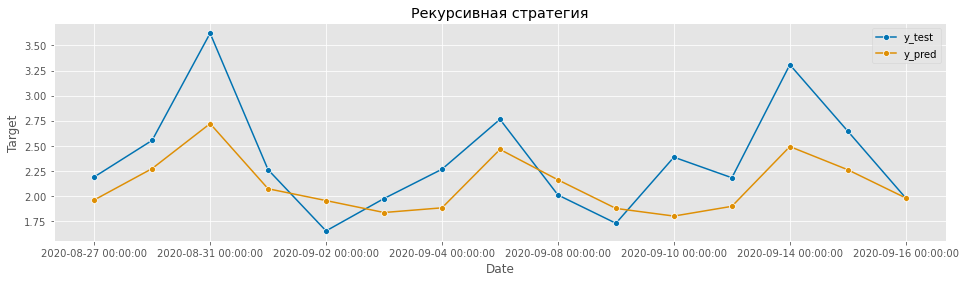

In [111]:
plot_series( y_test['Target'], pd.DataFrame({'predict':predict},index=y_test.index)['predict'], labels=[ "y_test", "y_pred"]);
plt.xlabel('Date')
plt.title('Рекурсивная стратегия');

##### 7) Прямая стратегия (2 балла)

Внимание! Запрещается пользоваться функцией make_reduction из sktime. Прямую стратегию необходимо написать вручную!

 Реализуйте прямое прогнозирование на 15 шагов с помощью вашей любимой регрессионной модели.

In [112]:
# ༼ つ ◕_◕ ༽つ
def direct(reg, df_train, df_test, period):
    df_test['last'] = np.array([df_train['Target'][-1]]*len(period))
    y_tr = np.array([np.nan]*len(period))
    test = df_test.to_numpy()
    for i in range(1,16):
        shift = df_train['Target'].shift(i).to_numpy().reshape(-1,1)
        data = df_train.drop('Target',axis=1).to_numpy()
        train = np.hstack((data,shift))[i:]
        target = df_train['Target'].to_numpy().reshape(-1,1)[i:]
        model = reg.fit(train, target)
        data_test = df_test.to_numpy()[i-1].reshape(1, -1)
        y_tr[i-1] = model.predict(data_test)
    return y_tr

In [113]:
y_train, y_test = temporal_train_test_split(y = df_2[df_2.columns[:8]], test_size=15)

In [114]:
y_pred = direct(reg = Ridge(),df_train= y_train,df_test=y_test.drop('Target',axis=1), period = y_test.index)

In [115]:
df_4 = pd.DataFrame({'y_pred':y_pred}, index = y_test.index)

In [116]:
MAPE(y_test['Target'],y_pred)

0.1380143835242522

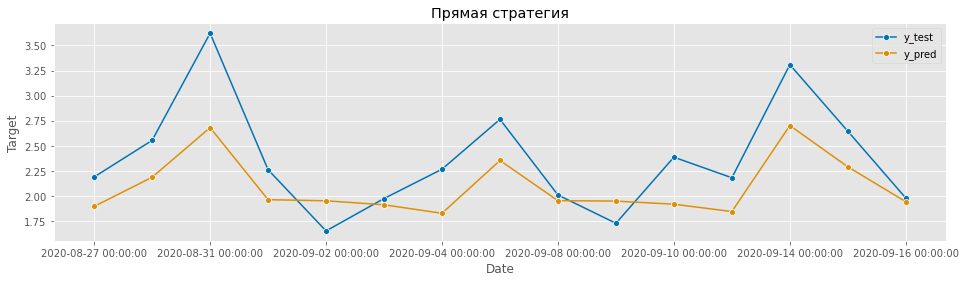

In [117]:
plot_series( y_test['Target'], df_4['y_pred'], labels=[ "y_test", "y_pred"]);
plt.xlabel('Date')
plt.title('Прямая стратегия');

##### 8) Результаты (0.5 балла)

Визуализируйте прогнозы двух стратегий и тестовые данные на одном графике. Подсчитайте MAPE прогнозов двух моделей. Какая оказалась лучше?

MAPE 0.13406216775434537


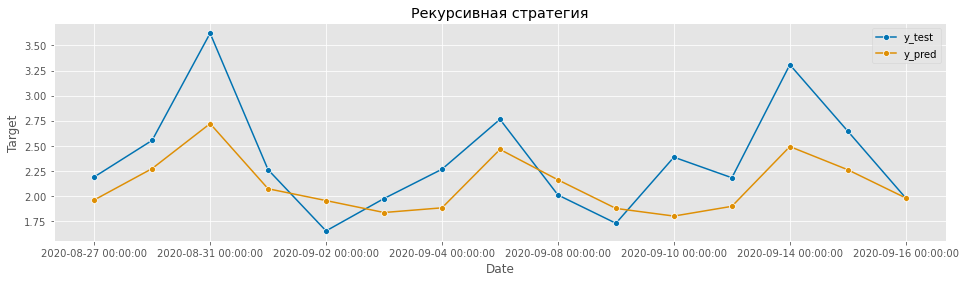

In [118]:
# ༼ つ ◕_◕ ༽つ
plot_series(y_test['Target'], pd.DataFrame({'predict':predict},index=y_test.index)['predict'], labels=["y_test", "y_pred"]);
plt.xlabel('Date')
plt.title('Рекурсивная стратегия');
print('MAPE',MAPE(y_test['Target'],pd.DataFrame({'predict':predict},index=y_test.index)['predict']))

MAPE 0.1380143835242522


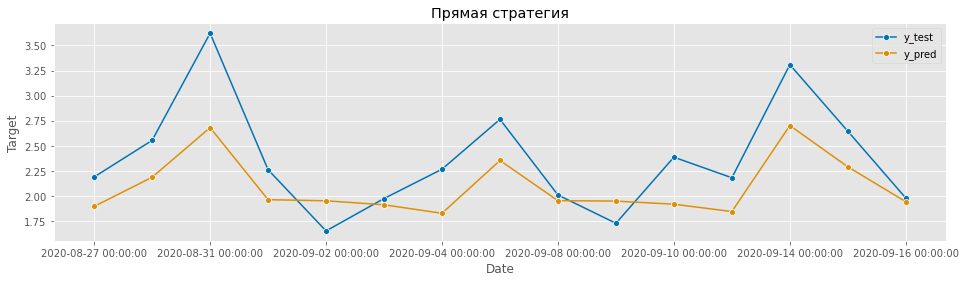

In [119]:
plot_series( y_test['Target'], df_4['y_pred'], labels=["y_test", "y_pred"]);
plt.xlabel('Date')
plt.title('Прямая стратегия');
print('MAPE',MAPE(y_test['Target'],df_4['y_pred']))